In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def party2colour(party):
    if party.startswith('Lab'):
        return 'red'
    if party.startswith('Grn'):
        return 'green'
    if party.startswith('Ind'):
        return 'grey'
    if party.startswith('LDem'):
        return 'yellow'
    if party.startswith('Con'):
        return 'blue'
    if party.startswith('UKIP'):
        return 'purple'

def clean_cols(df):
    df.columns = df.columns.str.lstrip(' ').str.rstrip(' ')
    return df

def get_insolvencies_by_la():
    df = pd.ExcelFile('data/Individual_insolvencies_by_location_2000-17_tables/Total insolvencies 2000_2017.xlsx')
    df = df.parse('Local Authorities')
    df.iloc[1] = df.iloc[1].ffill()
    df.columns = df.iloc[1].fillna('').astype(str) + ' '+ df.iloc[2].fillna('').astype(str)
    df = clean_cols(df)
    return df

def get_election_data():
    df = pd.read_csv('data/LE2018 ward-by-ward results [updated 08.05.18] - Totals.csv')
    df.iloc[0,0] = ''
    df.columns = df.iloc[1].fillna('') + ' ' + df.iloc[0].ffill()
    df = clean_cols(df)
    df = df.drop([0,1])
    df = df.replace(to_replace = '#DIV/0!', value = pd.np.nan)
    df = df.replace(to_replace = '#VALUE!', value = pd.np.nan)
    return df

In [45]:
df_insolv = get_insolvencies_by_la()

In [55]:
df_insolv_agged

Index(['2000 Number of new cases', '2000 Rate per 10,000 adult population',
       '2001 Number of new cases', '2001 Rate per 10,000 adult population',
       '2002 Number of new cases', '2002 Rate per 10,000 adult population',
       '2003 Number of new cases', '2003 Rate per 10,000 adult population',
       '2004 Number of new cases', '2004 Rate per 10,000 adult population',
       '2005 Number of new cases', '2005 Rate per 10,000 adult population',
       '2006 Number of new cases', '2006 Rate per 10,000 adult population',
       '2007 Number of new cases', '2007 Rate per 10,000 adult population',
       '2008 Number of new cases', '2008 Rate per 10,000 adult population',
       '2009 Number of new cases', '2009 Rate per 10,000 adult population',
       '2010 Number of new cases', '2010 Rate per 10,000 adult population',
       '2011 Number of new cases', '2011 Rate per 10,000 adult population',
       '2012 Number of new cases', '2012 Rate per 10,000 adult population',
       '2013

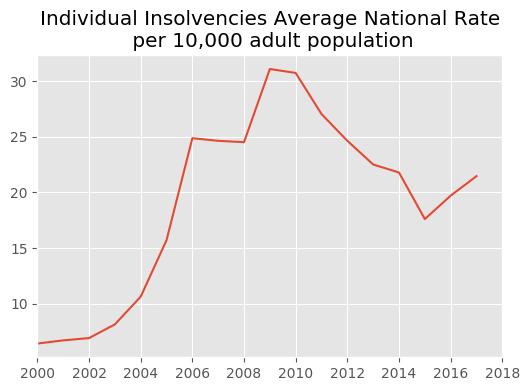

In [46]:
df_insolv_agged = df_insolv.drop([0,1,2])
df_insolv_agged = df_insolv_agged.drop(['Local Authorities'],axis=1)
df_insolv_agged = df_insolv_agged.drop(['Codes'],axis=1)

s = df_insolv_agged.mean()
per_10k = s[s.index.str.contains('Rate per 10,000 adult population')]
per_10k.index = per_10k.index.to_series().apply(lambda x : float(x.split(' ')[0]))

plt.figure(dpi=100)
plt.title('Individual Insolvencies Average National Rate\n per 10,000 adult population')
per_10k.plot()
plt.xlim(2000,2018)
plt.savefig('images/national_insolvencies_rate.png')
plt.show()

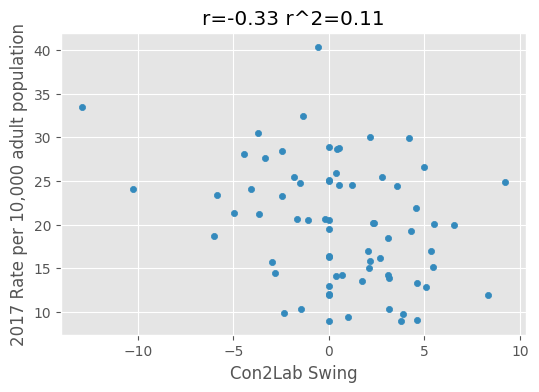

In [53]:
df_elec = get_election_data()
party_a = 'Con'
party_b = 'Lab'

df_elec[f'{party_a}2{party_b} Swing'] = (df_elec[f'{party_b} PCT +/-'].fillna(0).astype(float) - df_elec[f'{party_a} PCT +/-'].fillna(0).astype(float))/2

x_col = f'{party_a}2{party_b} Swing'
y_col = '2017 Rate per 10,000 adult population'

df_elect_lab = df_elec[['Authority',x_col]].rename(columns={'Authority' : 'Local Authorities'})
df_elect_lab['Local Authorities'] = df_elect_lab['Local Authorities'].str.replace('&','and')
df_elect_lab[x_col] = df_elect_lab[x_col].astype(float)
df_elect_lab = df_elect_lab.groupby('Local Authorities').mean().reset_index()

df_insolv_2016_nc = df_insolv.drop([0,1,2])[['Local Authorities',y_col]]

df_merged = df_elect_lab.merge(df_insolv_2016_nc,on='Local Authorities')
df_merged[[x_col, y_col]] = df_merged[[x_col, y_col]].astype(float)

fig,ax = plt.subplots(dpi=100)
df_merged.plot(ax=ax,kind='scatter',x=x_col,y=y_col)

r = df_merged.corr().iloc[0][y_col]
ax.set_title(f'r={round(r,2)} r^2={round(r**2,2)}')
plt.savefig('images/UKIP2Con.png')
plt.show()

In [58]:
df_merged.sort_values(by='2017 Rate per 10,000 adult population',ascending=False)

,Local Authorities,Con2Lab Swing,"2017 Rate per 10,000 adult population"
46,Plymouth,-0.557895,40.398190
43,Nuneaton and Bedworth,-12.911765,33.495858
26,Halton,-1.350000,32.463932
51,Redditch,-3.690000,30.472627
4,Barnsley,2.176190,30.079314
23,Exeter,4.215000,29.903633
65,Weymouth and Portland,0.000000,28.916831
68,Wirral,0.554545,28.774158
48,Preston,0.450000,28.697271
66,Wigan,-2.472000,28.451831


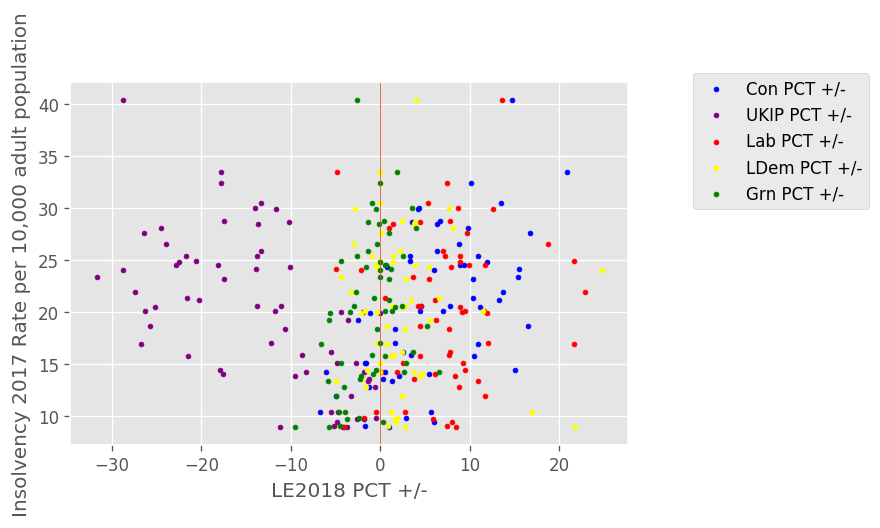

In [60]:
parties = ['Con','UKIP','Lab','LDem','Grn']
y_col = '2017 Rate per 10,000 adult population'
x_cols = [f'{party} PCT +/-' for party in parties]

df_elect_lab = df_elec[['Authority'] + x_cols].rename(columns={'Authority' : 'Local Authorities'})
df_elect_lab['Local Authorities'] = df_elect_lab['Local Authorities'].str.replace('&','and')

df_elect_lab[x_cols] = df_elect_lab[x_cols].astype(float)
df_elect_lab = df_elect_lab.groupby('Local Authorities').mean().reset_index()

df_insolv_2016_nc = df_insolv.drop([0,1,2])[['Local Authorities',y_col]]

df_merged = df_elect_lab.merge(df_insolv_2016_nc,on='Local Authorities')
df_merged[x_cols + [y_col]] = df_merged[x_cols + [y_col]].astype(float)

fig,ax = plt.subplots(dpi=120)
for x_col in x_cols:
    df_merged.plot(ax=ax,kind='scatter',x=x_col,y=y_col,label=x_col,c=party2colour(x_col),s=8)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_ylabel('Insolvency ' + y_col)
ax.set_xlabel('LE2018 PCT +/-')
plt.axvline(0,linewidth=0.5)
plt.savefig('images/all_parties_insolvencies.png')
plt.show()

In [52]:
corr = df_merged.corr()
corr['r'] = corr[y_col]
corr['r^2'] = corr[y_col]**2
corr = corr[['r','r^2']].sort_values(by='r')
print(corr[corr.r != 1.00])

                     r       r^2
UKIP PCT +/- -0.585808  0.343171
LDem PCT +/- -0.083332  0.006944
Lab PCT +/-   0.131011  0.017164
Grn PCT +/-   0.351160  0.123313
Con PCT +/-   0.585564  0.342885


In [7]:
df_merged

,Local Authorities,Con PCT +/-,UKIP PCT +/-,Lab PCT +/-,LDem PCT +/-,Grn PCT +/-,"2017 Rate per 10,000 adult population"
0,Barking and Dagenham,13.800000,-27.458824,22.958824,-3.311765,-2.723529,21.918253
1,Barnet,5.742857,-4.666667,2.795238,1.161905,-4.566667,10.361086
2,Bexley,48.782353,5.164706,36.341176,5.170588,1.629412,16.304004
3,Brent,1.290000,-1.405000,10.930000,-4.905000,-5.880000,13.357770
4,Bromley,5.468182,-17.604545,6.163636,4.781818,-0.822727,14.098296
5,Camden,-1.777778,-2.616667,5.955556,1.644444,-3.688889,9.745920
6,Croydon,27.989286,-3.692857,27.760714,3.971429,4.792857,16.996366
7,Ealing,-1.860870,-4.447826,5.239130,1.900000,1.686957,11.960805
8,Enfield,2.147619,-9.552381,8.423810,4.457143,-2.119048,13.843393
9,Greenwich,3.947059,-13.329412,9.911765,1.535294,-2.323529,25.397624


In [8]:
# import statsmodels.api as sm

# df_merged['random'] = 0
# df_merged['random'] = np.random.uniform(size=df_merged['random'].shape)

# for x_col in ['random']:
#     Y = df_merged['2017 Rate per 10,000 adult population']
#     X = df_merged[x_col]
#     X = sm.add_constant(X)

#     model = sm.OLS(Y,X)
#     results = model.fit()
#     print(x_col)
#     print(results.t_test([1, 0]))
#     print(results.f_test(pd.np.identity(2)))

In [9]:
df_elect_lab.sort_values(by='UKIP PCT +/-')

,Local Authorities,Con PCT +/-,UKIP PCT +/-,Lab PCT +/-,LDem PCT +/-,Grn PCT +/-
0,Barking and Dagenham,13.800000,-27.458824,22.958824,-3.311765,-2.723529
14,Havering,10.483333,-21.516667,4.505556,1.261111,0.550000
15,Hillingdon,15.122727,-17.931818,9.477273,-1.527273,-0.427273
4,Bromley,5.468182,-17.604545,6.163636,4.781818,-0.822727
27,Sutton,8.755556,-15.844444,5.233333,1.311111,-0.616667
9,Greenwich,3.947059,-13.329412,9.911765,1.535294,-2.323529
19,Kingston upon Thames,-4.125000,-11.231250,-4.062500,21.806250,-5.775000
16,Hounslow,1.630000,-10.705000,7.730000,2.745000,-0.320000
8,Enfield,2.147619,-9.552381,8.423810,4.457143,-2.119048
29,Waltham Forest,3.460000,-8.825000,8.695000,-1.815000,0.810000
